Name: Adam Ten Hoeve  
Course: STAT 4010  
Project: Comparing Machine Learning Models on Titanic Data

In [16]:
library(tidyverse)

In [29]:
set.seed(99)
train = read.csv("train.csv", stringsAsFactors = F)
test = read.csv("test.csv", stringsAsFactors = F)

full = bind_rows(train, test)
str(full)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


# Data Cleaning

In [24]:
# Find how much of the data is missing/NA/NaN
len = nrow(train)
for (i in names(train))
{
    n = 0
    # Count rows that are NA
    n = n + sum(is.na(train[[i]]))
    # Count rows that are empty
    n = n + length(which(train[[i]] == ""))
    # Output results
    cat("Column", i, "is missing", n, "values, which is", n/len, "of the population\n")
}

Column PassengerId is missing 0 values, which is 0 of the population
Column Survived is missing 0 values, which is 0 of the population
Column Pclass is missing 0 values, which is 0 of the population
Column Name is missing 0 values, which is 0 of the population
Column Sex is missing 0 values, which is 0 of the population
Column Age is missing 177 values, which is 0.1986532 of the population
Column SibSp is missing 0 values, which is 0 of the population
Column Parch is missing 0 values, which is 0 of the population
Column Ticket is missing 0 values, which is 0 of the population
Column Fare is missing 0 values, which is 0 of the population
Column Cabin is missing 687 values, which is 0.7710438 of the population
Column Embarked is missing 2 values, which is 0.002244669 of the population


From the above missing values, we can see that 2 "Embarked" values are missing and a large portion of Age and Cabin values are missing.  

To start, lets look at the "Embarked" and "Age" values. We don't just want to drop the rows with that data, so we need a way of assigning them likely values for that data. A way to do this is to just randomly sample from the given embarked and age values.

In [25]:
set.seed(99)
# Let's first do this for embarked, because only 2 values so easier to show.
train$Embarked = as.factor(train$Embarked)
test$Embarked = as.factor(test$Embarked)

# Find the rows with missing values
missingRowTrain = which(train$Embarked == "")
missingRowTest = which(test$Embarked == "")

# Create temporary dataframe without those values
tempTrain = train[-missingRowTrain, ]
# tempTest = test[-missingRowTest, ]

# Assign the embarked value of the missing rows with a randomly samples value from the current distribution
# for (index in missingRowTrain)
# {
#     train[index, ]$Embarked = sample(tempTrain$Embarked, 1)
# }

# # Repeat for the training set
# for (index in missingRowTest)
# {
#     test[index, ]$Embarked = sample(tempTrain$Embarked, 1)
# }



In [26]:
# Let's do the same for age.
# train$Age = as.factor(train$Age)
# test$Age = as.factor(test$Age)

missingRowTrain = which(is.na(train$Age))
missingRowTest = which(is.na(test$Age))

tempTrain = train[-missingRowTrain, ]

for(index in missingRowTrain)
{
    train[index, ]$Age = sample(tempTrain$Age, 1)
}

for(index in missingRowTest)
{
    test[index, ]$Age = sample(tempTrain$Age, 1)
}

For now, we are going to drop the Cabin column. This is because most of the values are not present and randomly sampling could skew the results.

In [27]:
drops = c("Cabin")
train = train[, !(names(train) %in% drops)]
test = test[, !(names(test) %in% drops)]

In [28]:
# train$Survived = as.factor(train$Survived)
# train$Pclass = as.factor(train$Pclass)
# train$Sex = as.factor(train$Sex)
# train$SibSp = as.factor(train$SibSp)
# train$Embarked = as.factor(train$Embarked)

# test$Survived = as.factor(test$Survived)
# test$Pclass = as.factor(test$Pclass)
# test$Sex = as.factor(test$Sex)
# test$SibSp = as.factor(test$SibSp)
# test$Embarked = as.factor(test$Embarked)

ERROR: Error in `$<-.data.frame`(`*tmp*`, Survived, value = structure(integer(0), .Label = character(0), class = "factor")): replacement has 0 rows, data has 418


# Time for some Models: MLR

In [7]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,26,0,0,330877,8.4583,Q


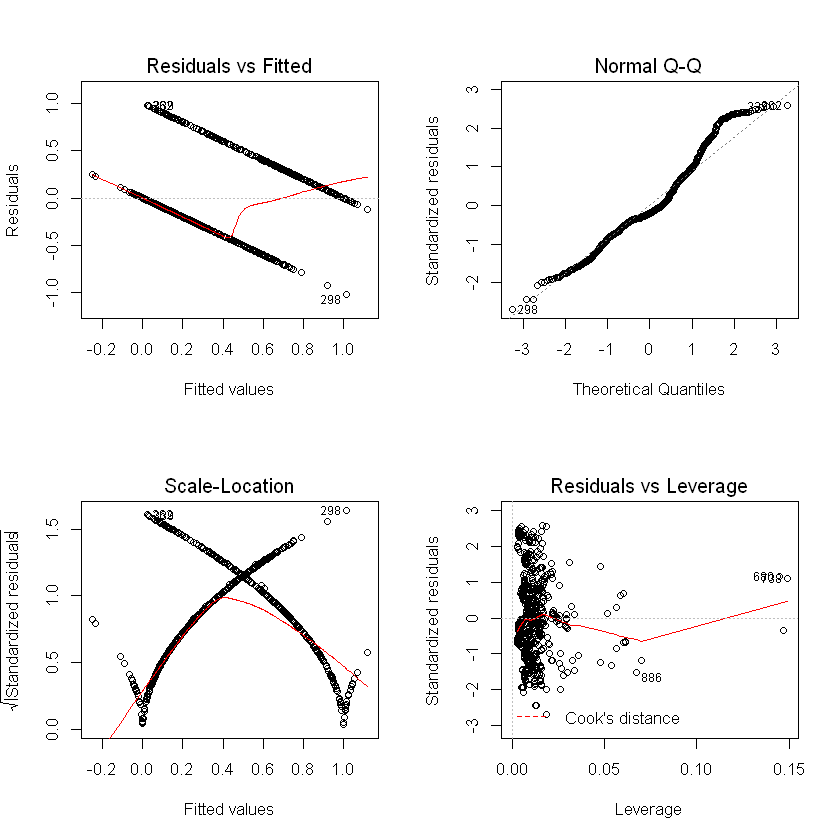

In [11]:
lmod = lm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data = train)
par(mfrow = c(2,2)); plot(lmod)

Obviously something is wrong. Probably the distrete result variable but who knows.

In [12]:
predict(lmod, newdata = test)

1            2            3            4            5            6 
 0.135643338  0.489444738  0.186606867  0.102313265  0.580285217  0.156289408 
           7            8            9           10           11           12 
 0.663587208  0.223349929  0.717570050  0.053567809  0.164194411  0.357112672 
          13           14           15           16           17           18 
 0.938583273  0.083476381  0.833283106  0.823816607  0.299132306  0.195778351 
          19           20           21           22           23           24 
 0.572501760  0.605793839  0.359324581  0.161136970  0.942602233  0.525465685 
          25           26           27           28           29           30 
 0.912446310 -0.030231940  1.030866044  0.189568627  0.379080053  0.175720376 
          31           32           33           34           35           36 
 0.137293986  0.207504633  0.522937861  0.436812033  0.462354932  0.206129074 
          37           38           39           40           41           42 
 0.528715386  0.636523227  0.110828941  0.053697598  0.108861594  0.473182529 
          43           44           45           46           47           48 
 0.044126844  0.764772098  0.839133009  0.110385036  0.431326657  0.174949266 
          49           50           51           52           53           54 
 0.891732120  0.548175500  0.418796634  0.337424896  0.716894111  0.862583184 
          55           56           57           58           59           60 
 0.370697282  0.073026921  0.068978648  0.110307528 -0.052549976  1.043534325 
          61           62           63           64           65           66 
 0.143495332  0.247262321  0.139314423  0.696732735  0.523139255  0.746327778 
          67           68           69           70           71           72 
 0.713335459  0.357595112  0.488956433  0.779768159  0.688460150  0.126936069 
          73           74           75           76           77           78 
 0.603196840  0.499075790  1.033335282  0.534313754  0.098000819  0.751191421 
          79           80           81           82           83           84 
 0.255401030  0.688460150  0.207016327  0.286381194  0.344693224  0.048279569 
          85           86           87           88           89           90 
 0.335927943  0.038786495  0.676077117  0.648770044  0.605663834  0.321014439 
          91           92           93           94           95           96 
 0.594884863  0.048245522  0.885203153  0.110420266  0.513080147  0.110348621 
          97           98           99          100          101          102 
 0.718210056  0.093825772  0.640435228  0.077301740  0.917257811  0.232509750 
         103          104          105          106          107          108 
 0.021776082  0.106202943  0.673092674  0.102080523  0.191528484  0.150110372 
         109          110          111          112          113          114 
 0.123026436  0.303008912  0.279470998  0.696748011  0.978513894  0.711097600 
         115          116          117          118          119          120 
 0.812311525  0.171260600  0.145878608  0.668464989  0.481420694  0.733601186 
         121          122          123          124          125          126 
 0.840063856  0.086296766  0.951026920  0.097775343  0.071453872  0.641033540 
         127          128          129          130          131          132 
 0.122768069  0.577620981  0.205723241  0.114560082  0.081441556  0.397869917 
         133          134          135          136          137          138 
 0.510162036  0.222818739  0.035860121  0.114504897  0.173009364  0.271960293 
         139          140          141          142          143          144 
 0.628070965 -0.064573035  0.469674346  0.955686970  0.349257637  0.267344645 
         145          146          147          148          149          150 
 0.373826950 -0.028538406  0.434778753  0.122839714  0.440064002  0.205945131 
         151          152          153          154          